<a href="https://colab.research.google.com/github/Kateriiina/Lesson/blob/main/%D0%90%D0%B4%D0%B0%D0%BF%D1%82%D0%B8%D0%B2%D0%BD%D0%B8%D0%B9_%D1%84%D1%96%D0%BB%D1%8C%D1%82%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

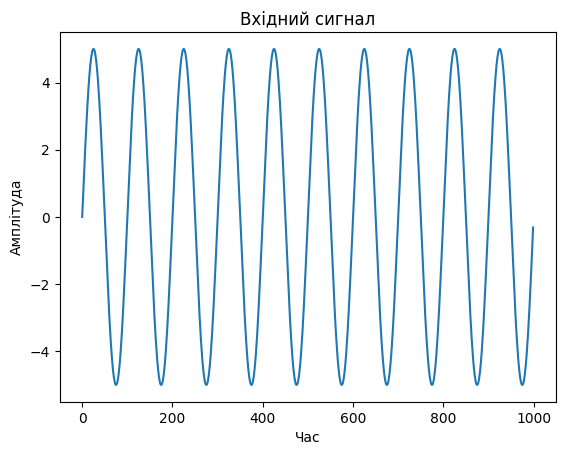

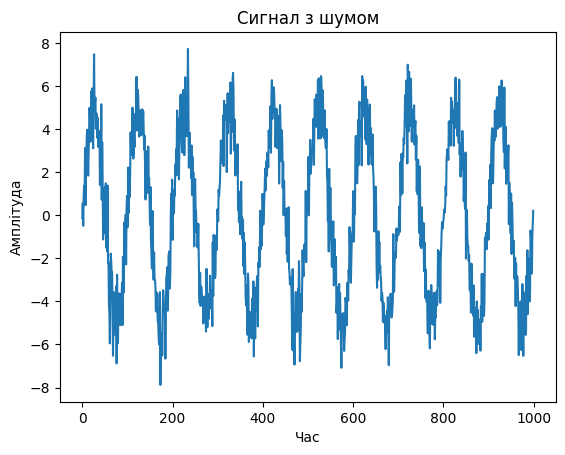

Сигнал-шум співвідношення (SNR) до обробки: 10.934068621820538


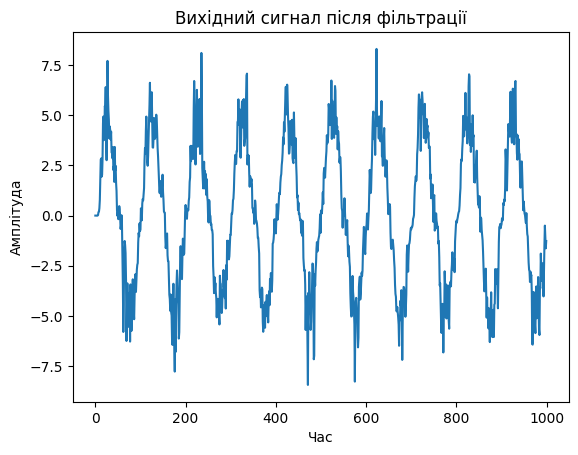

Сигнал-шум співвідношення (SNR) після обробки: 10.705026300749587
Середньоквадратична помилка (MSE): 1.0626919308328757


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Функція для створення вхідного сигналу
def generate_input_signal(timesteps):
    frequency = 1
    amplitude = 5
    return amplitude * np.sin(2 * np.pi * frequency * timesteps)

# Функція для створення шуму
def generate_noise(timesteps):
    return np.random.normal(0, 1, len(timesteps))

# Функція для створення вихідного сигналу з шумом
def generate_output_signal(input_signal, noise):
    return input_signal + noise

# Функція для створення адаптивного фільтра
def adaptive_filter(input_signal, output_signal, filter_order, mu):
    num_samples = len(input_signal)
    filtered_signal = np.zeros(num_samples)
    w = np.zeros(filter_order)  # Ініціалізація коефіцієнтів фільтра
    for i in range(filter_order, num_samples):
        x = input_signal[i-filter_order:i]
        y = np.dot(w, x)
        error = output_signal[i] - y
        w += mu * error * x
        filtered_signal[i] = y
    return filtered_signal

# Функція для обчислення SNR
def calculate_snr(signal, noise):
    signal_power = np.mean(signal ** 2)
    noise_power = np.mean(noise ** 2)
    return 10 * np.log10(signal_power / noise_power)

# Функція для обчислення MSE
def calculate_mse(signal, filtered_signal):
    return np.mean((signal - filtered_signal) ** 2)

# Функція для візуалізації сигналу
def plot_signal(signal, title):
    plt.plot(signal)
    plt.title(title)
    plt.xlabel('Час')
    plt.ylabel('Амплітуда')
    plt.show()

# Параметри сигналу та обробки
timesteps = np.arange(0, 10, 0.01)  # Часові відліки
input_signal = generate_input_signal(timesteps)
noise = generate_noise(timesteps)
output_signal = generate_output_signal(input_signal, noise)

# Візуалізація вхідного сигналу
plot_signal(input_signal, 'Вхідний сигнал')

# Візуалізація сигналу після додавання шуму
plot_signal(output_signal, 'Сигнал з шумом')

# Обчислення SNR до обробки
snr_before = calculate_snr(input_signal, noise)
print("Сигнал-шум співвідношення (SNR) до обробки:", snr_before)

# Параметри адаптивного фільтра
filter_order = 3  # Порядок фільтра
mu = 0.01  # Крок навчання

# Застосування адаптивного фільтра
filtered_signal = adaptive_filter(output_signal, output_signal, filter_order, mu)

# Візуалізація вихідного сигналу після фільтрації
plot_signal(filtered_signal, 'Вихідний сигнал після фільтрації')

# Обчислення SNR після обробки
snr_after = calculate_snr(input_signal, input_signal - filtered_signal)
print("Сигнал-шум співвідношення (SNR) після обробки:", snr_after)

# Обчислення MSE
mse = calculate_mse(input_signal, filtered_signal)
print("Середньоквадратична помилка (MSE):", mse)
